In [1]:
import pandas as pd
import numpy as np


from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

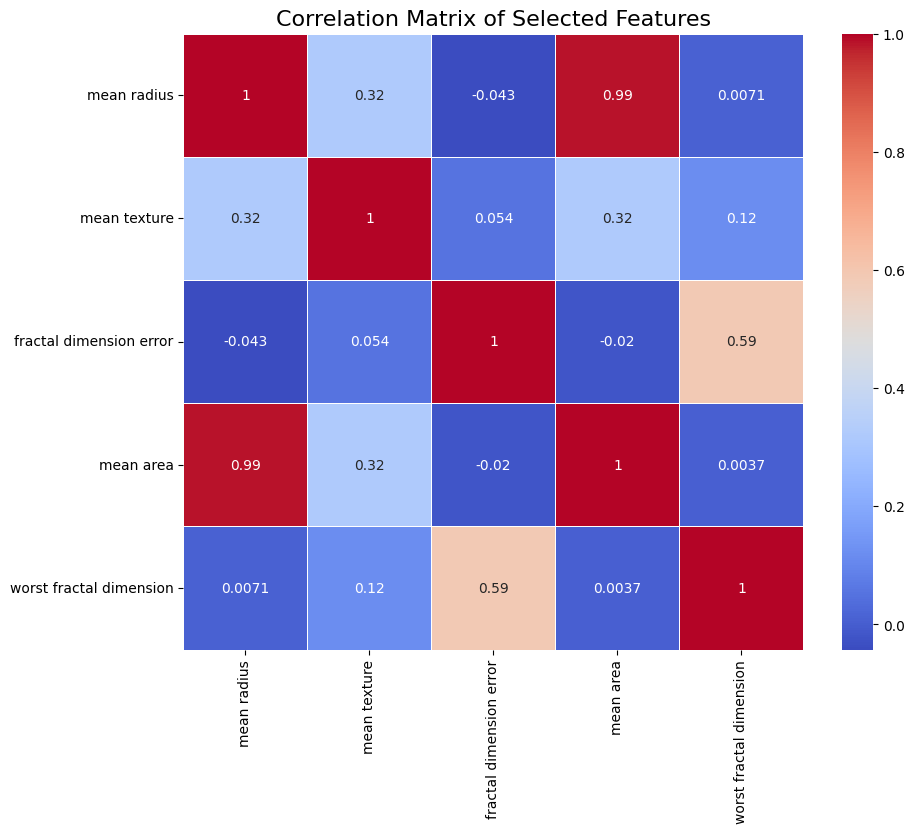

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Define the selected features
selected_features = ['mean radius', 'mean texture', 'fractal dimension error', 'mean area','worst fractal dimension']

corr_matrix = df[selected_features].corr()
# Step 3: Plot the correlation matrix using Seaborn’s heatmap
plt.figure(figsize=(10, 8)) # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title("Correlation Matrix of Selected Features", fontsize=16)

# Show the heatmap
plt.show()

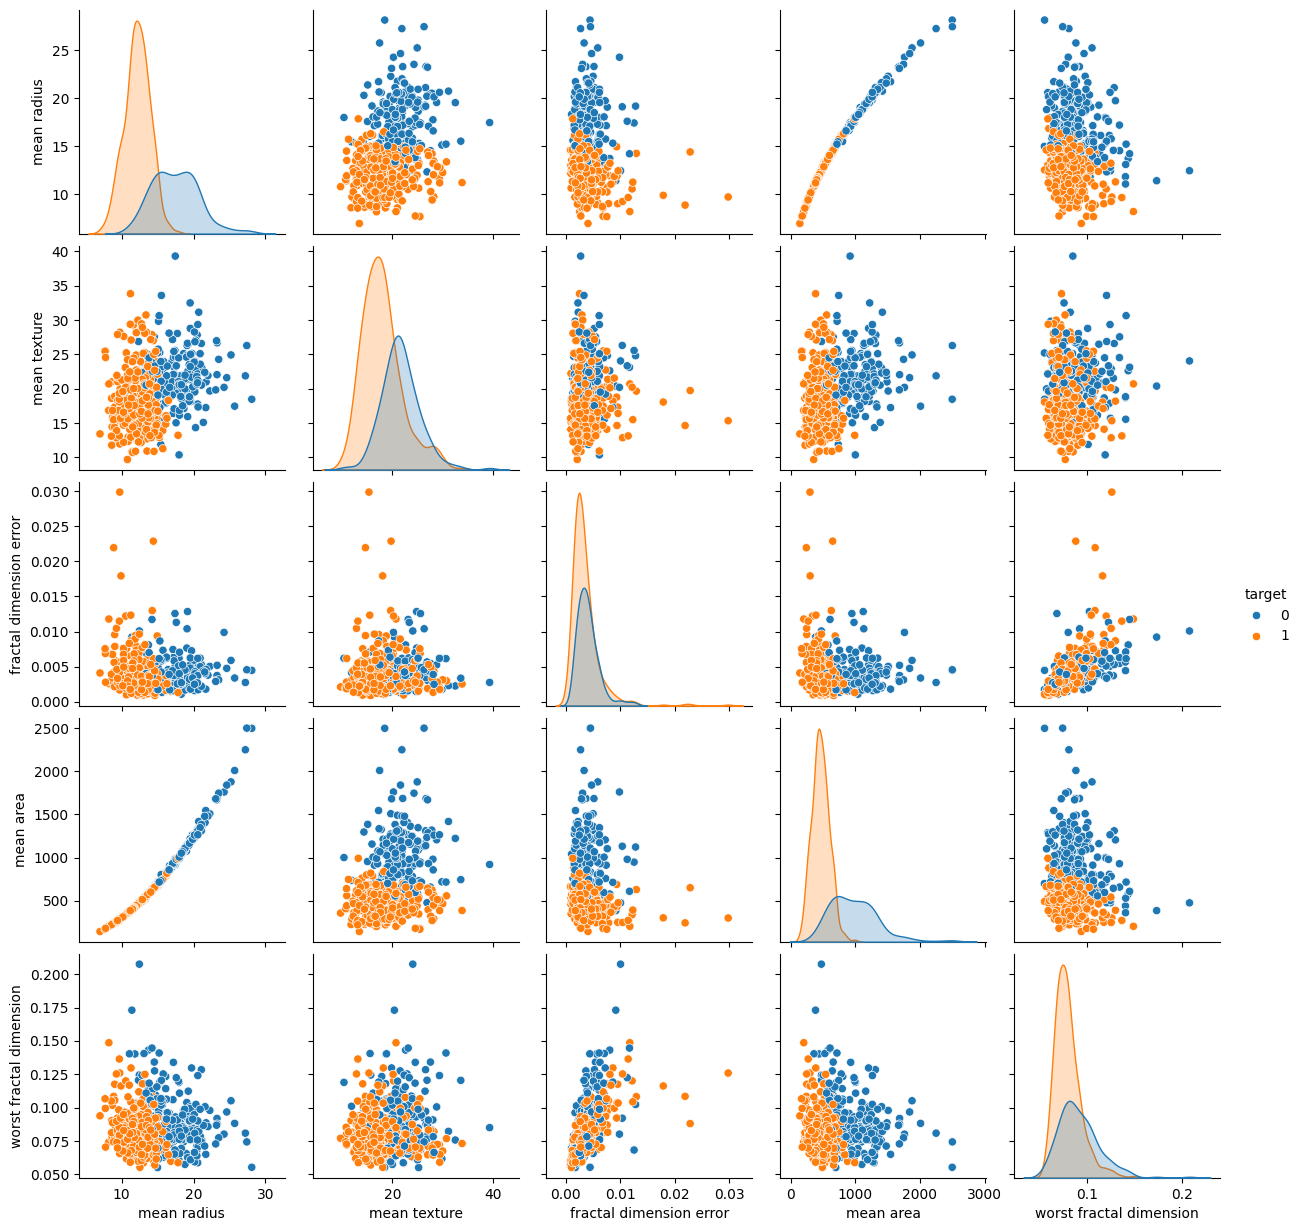

In [3]:
# Create a subset of the DataFrame that includes the selected features + ’target’
pairplot_data = df[selected_features + ['target']]

# Generate pair plots using seaborn (with the subset of features and target)
sns.pairplot(pairplot_data, hue='target', diag_kind='kde')

# Show the pair plot
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[selected_features] # Features
y = df['target'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#Fit the Logistic Regression model
model = LogisticRegression() # Increase max_iter if needed
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate the m o d e l s performance

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.91
Confusion Matrix:
[[37  6]
 [ 4 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
! pip install statsmodels

In [6]:
import statsmodels.api as sm


# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the Logistic Regression model using statsmodels
try:

    model = sm.Logit(y, X)
    result = model.fit(maxiter=1000)
    # Increase max_iter if needed
    # Obtain and interpret the summary
    print(result.summary())
    # Check p-values
    p_values = result.pvalues

    print("\nP-values for each predictor:")
    print(p_values)

    # Determine which features can be discarded (e.g., p > 0.05)
    discarded_features = p_values[p_values > 0.05].index.tolist()
    print("\nFeatures that can be discarded (p > 0.05):")
    print(discarded_features)

except Exception as e:
    print(f"An error occurred: {e}")

Optimization terminated successfully.
         Current function value: 0.138667
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.7900
Time:                        06:34:39   Log-Likelihood:                -78.901
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.793e-126
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.3091      8.318      1.600      0.110      -2.995  